# Data Exploration

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

### Importing the data set.

In [2]:
data = pd.read_csv('ds_salaries.csv',index_col=0)

### First and last 2 rows

In [8]:
data.head(2)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S


In [9]:
data.tail(2)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
605,2022,SE,FT,Data Analyst,150000,USD,150000,US,100,US,M
606,2022,MI,FT,AI Scientist,200000,USD,200000,IN,100,US,L


### Checking for unique values in each column

In [10]:
data.nunique()

work_year               3
experience_level        4
employment_type         4
job_title              50
salary                272
salary_currency        17
salary_in_usd         369
employee_residence     57
remote_ratio            3
company_location       50
company_size            3
dtype: int64

### Checking Basic Description of Numerical Data

In [11]:
data.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,607.000000,6.070000e+02,607.000000,607.00000
mean,2021.405272,3.240001e+05,112297.869852,70.92257
std,0.692133,1.544357e+06,70957.259411,40.70913
min,2020.000000,4.000000e+03,2859.000000,0.00000
25%,2021.000000,7.000000e+04,62726.000000,50.00000
50%,2022.000000,1.150000e+05,101570.000000,100.00000
75%,2022.000000,1.650000e+05,150000.000000,100.00000
max,2022.000000,3.040000e+07,600000.000000,100.00000


### Checking Basic Description of Textual Data

In [12]:
data.describe(include = 'object')

,experience_level,employment_type,job_title,salary_currency,employee_residence,company_location,company_size
count,607,607,607,607,607,607,607
unique,4,4,50,17,57,50,3
top,SE,FT,Data Scientist,USD,US,US,M
freq,280,588,143,398,332,355,326


### Checking for Null Values and Data types

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 607 entries, 0 to 606
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           607 non-null    int64 
 1   experience_level    607 non-null    object
 2   employment_type     607 non-null    object
 3   job_title           607 non-null    object
 4   salary              607 non-null    int64 
 5   salary_currency     607 non-null    object
 6   salary_in_usd       607 non-null    int64 
 7   employee_residence  607 non-null    object
 8   remote_ratio        607 non-null    int64 
 9   company_location    607 non-null    object
 10  company_size        607 non-null    object
dtypes: int64(4), object(7)
memory usage: 56.9+ KB


In [14]:
data.isna().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

### Checking for Duplicate Values

In [15]:
data.drop_duplicates(inplace = True)
data[data.duplicated() == True].count()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

### Num of Rows and Columns

In [16]:
data.shape

(565, 11)

### Removing un-necessary columns

In [17]:
df = data[['work_year', 'experience_level', 'employment_type', 'job_title', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size']].copy()
df.head(2)

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,JP,0,JP,S


## Salary Distribution

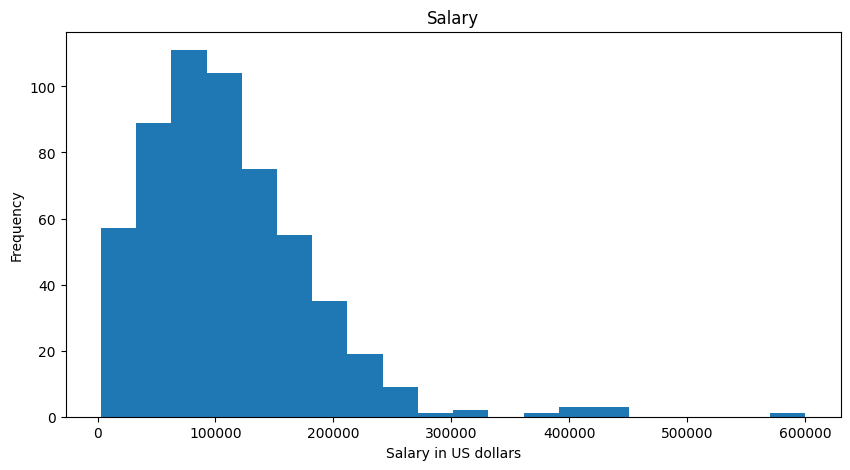

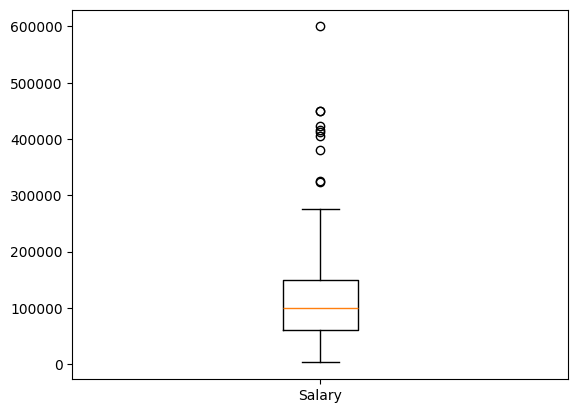

In [18]:
plt.figure(figsize=(10,5))
plt.hist(df.salary_in_usd,bins=20)
plt.title('Salary')
plt.xlabel('Salary in US dollars')
plt.ylabel('Frequency')
plt.show()
plt.boxplot([df.salary_in_usd],
            tick_labels=['Salary'])
plt.show()

## Removing Outliers

In [19]:
Q1 = df['salary_in_usd'].quantile(0.25)
Q3 = df['salary_in_usd'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_no_outliers = df[(df['salary_in_usd'] >= lower_bound) & (df['salary_in_usd'] <= upper_bound)]

df = df_no_outliers

## Job Titles Distribution

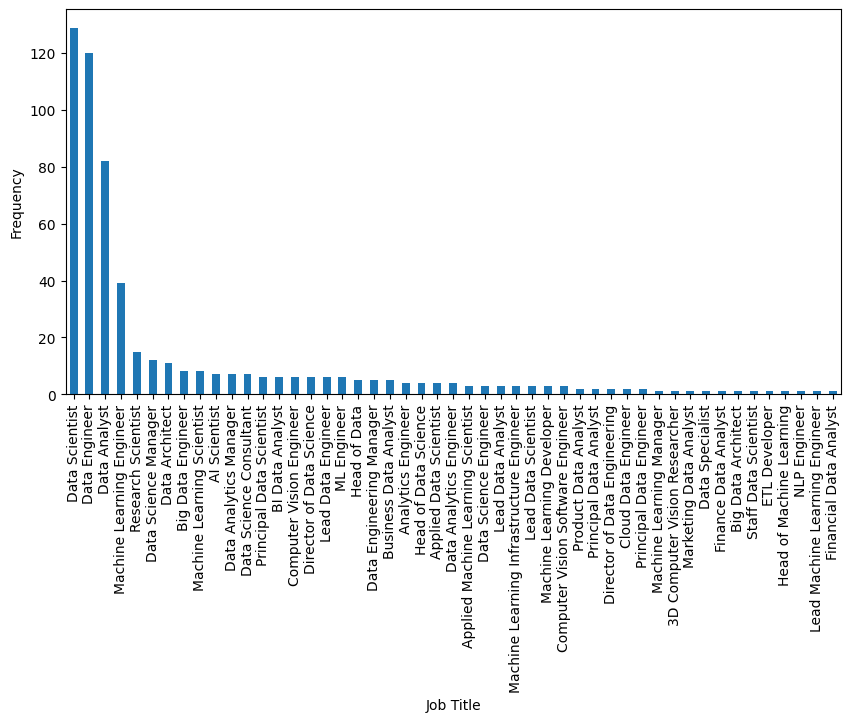

In [20]:
plt.figure(figsize=(10,5))
df.job_title.value_counts().plot(kind='bar')
plt.xlabel('Job Title')
plt.ylabel('Frequency')
plt.show()

## Company Sizes Distribution

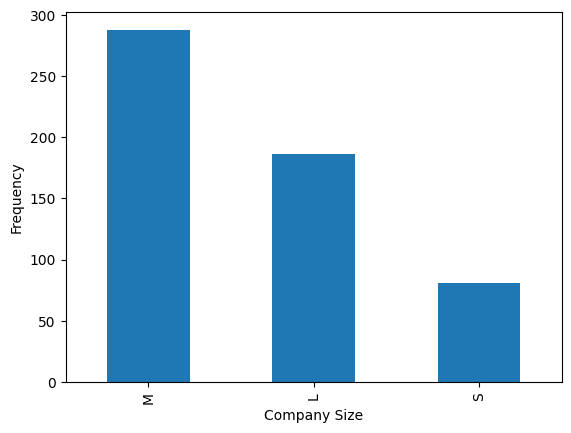

In [21]:
df.company_size.value_counts().plot(kind='bar')
plt.xlabel('Company Size')
plt.ylabel('Frequency')
plt.show()

## Work Year Distribution

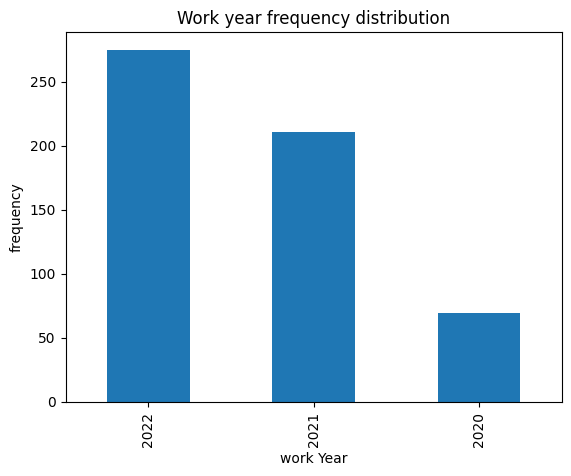

In [22]:
work_year_counts = df.work_year.value_counts()
work_year_counts.plot(kind='bar')
plt.xlabel('work Year')
plt.ylabel('frequency')
plt.title('Work year frequency distribution')
plt.show()

## Experience Level Distribution

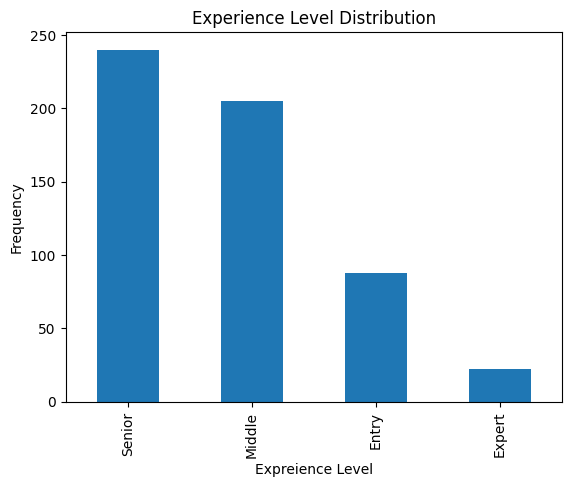

In [23]:
df.experience_level.value_counts().plot(kind='bar')
plt.xticks(ticks = range(4),labels=['Senior','Middle','Entry','Expert'])
plt.title('Experience Level Distribution')
plt.xlabel('Expreience Level')
plt.ylabel('Frequency')
plt.show()

## Employee Residence Distribution

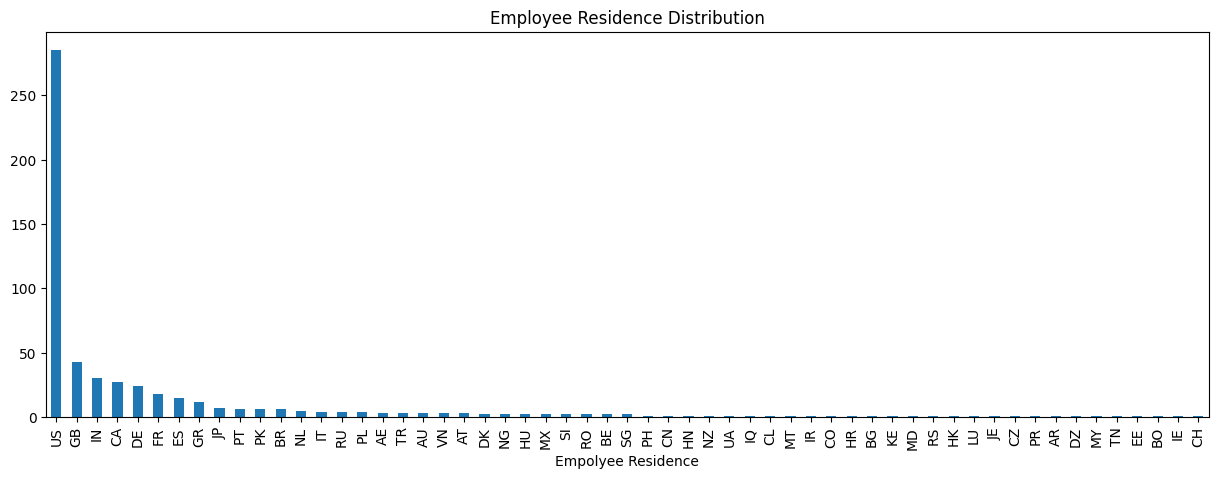

In [24]:
plt.figure(figsize=(15,5))
df.employee_residence.value_counts().plot(kind='bar')
plt.xlabel('Empolyee Residence')
plt.title('Employee Residence Distribution')
plt.show()

## Remote Work Percentage Distribution

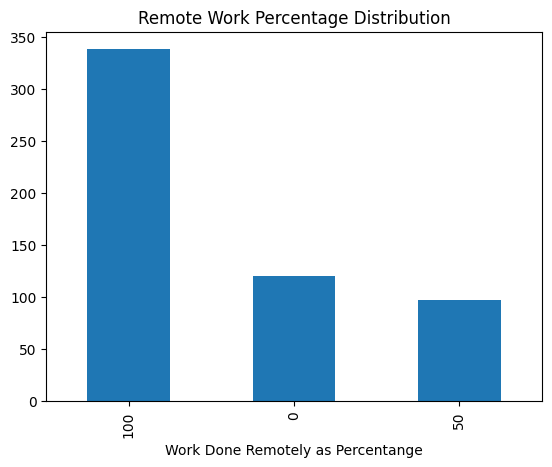

In [25]:
df.remote_ratio.value_counts().plot(kind='bar')
plt.xlabel('Work Done Remotely as Percentange')
plt.title('Remote Work Percentage Distribution')
plt.show()

### Company Size Vs Salary Relationship

        Outliers are present here, need to decide what to do with it.


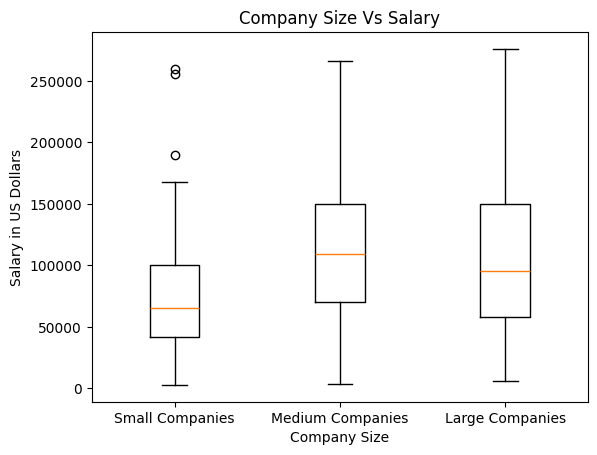

In [26]:
smallSizeCompanies = df[df.company_size == 'S'].salary_in_usd
mediumSizeCompanies = df[df.company_size == 'M'].salary_in_usd
largeSizeCompanies = df[df.company_size == 'L'].salary_in_usd
plt.boxplot([smallSizeCompanies,mediumSizeCompanies,largeSizeCompanies],
            tick_labels=['Small Companies','Medium Companies','Large Companies'])
plt.title('Company Size Vs Salary')
plt.xlabel('Company Size')
plt.ylabel('Salary in US Dollars')
plt.show()

### Employment Type vs Salary Relationship
        Outliers present here, need to decide what to do with it.

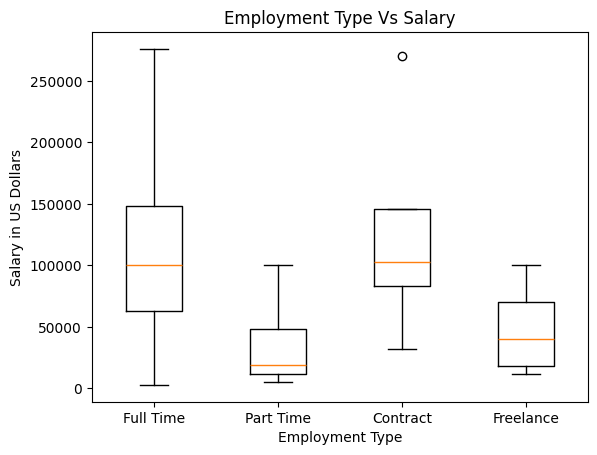

In [27]:
fullTime = df[df.employment_type == 'FT'].salary_in_usd
partTime = df[df.employment_type == 'PT'].salary_in_usd
contract = df[df.employment_type == 'CT'].salary_in_usd
freelance = df[df.employment_type == 'FL'].salary_in_usd

plt.boxplot([fullTime,partTime,contract,freelance],tick_labels = ['Full Time','Part Time','Contract','Freelance'])
plt.title('Employment Type Vs Salary')
plt.xlabel('Employment Type')
plt.ylabel('Salary in US Dollars')
plt.show()

## Experience Level vs Salary Relationship

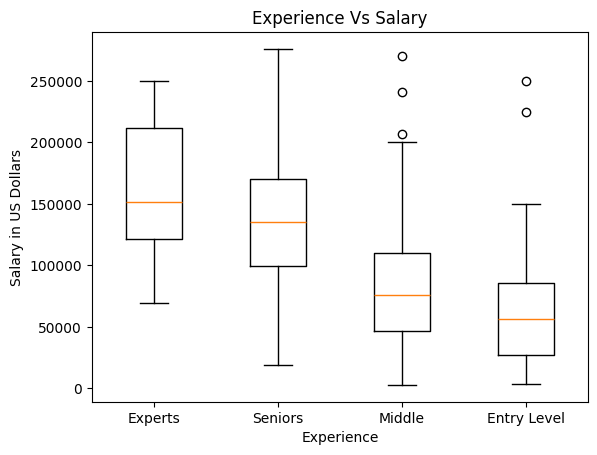

In [28]:
senior_experience = df[df.experience_level == 'SE'].salary_in_usd
middle_experience = df[df.experience_level == 'MI'].salary_in_usd
entry_experience = df[df.experience_level == 'EN'].salary_in_usd
expert_experience = df[df.experience_level == 'EX'].salary_in_usd

plt.boxplot([expert_experience,senior_experience,middle_experience,entry_experience],
            tick_labels = ['Experts','Seniors','Middle','Entry Level'])
plt.xlabel('Experience')
plt.ylabel('Salary in US Dollars')
plt.title('Experience Vs Salary')
plt.show()

## Encoding Ordinal Categorical Data

In [29]:
from pandas.api.types import CategoricalDtype

# Define custom ordering
company_size_order = CategoricalDtype(categories=['S', 'M', 'L'], ordered=True)

df['company_size'] = df['company_size'].astype(company_size_order)
df['company_size_encoded'] = df['company_size'].cat.codes

experience_level_order = CategoricalDtype(categories=['EN', 'MI', 'SE','EX'], ordered=True)

df['experience_level'] = df['experience_level'].astype(experience_level_order)
df['experience_level_encoded'] = df['experience_level'].cat.codes


df = df[['employment_type', 'job_title',
       'salary_in_usd', 'employee_residence', 'remote_ratio',
       'company_location', 'company_size_encoded', 'experience_level_encoded']].copy()


## Encoding Nominal Categorical Data

In [30]:
encoding_map = df.groupby('job_title')['salary_in_usd'].mean().to_dict()
df['job_title_encoded'] = df['job_title'].map(encoding_map)

encoding_map = df.groupby('employment_type')['salary_in_usd'].mean().to_dict()
df['employment_type_encoded'] = df['employment_type'].map(encoding_map)

encoding_map = df.groupby('employee_residence')['salary_in_usd'].mean().to_dict()
df['employee_residence_encoded'] = df['employee_residence'].map(encoding_map)

encoding_map = df.groupby('company_location')['salary_in_usd'].mean().to_dict()
df['company_location_encoded'] = df['company_location'].map(encoding_map)

df = df[['salary_in_usd', 'remote_ratio','company_size_encoded', 
        'experience_level_encoded', 'job_title_encoded',
       'employment_type_encoded', 'employee_residence_encoded',
       'company_location_encoded']].copy()

### Correlation of Attributes with Salary

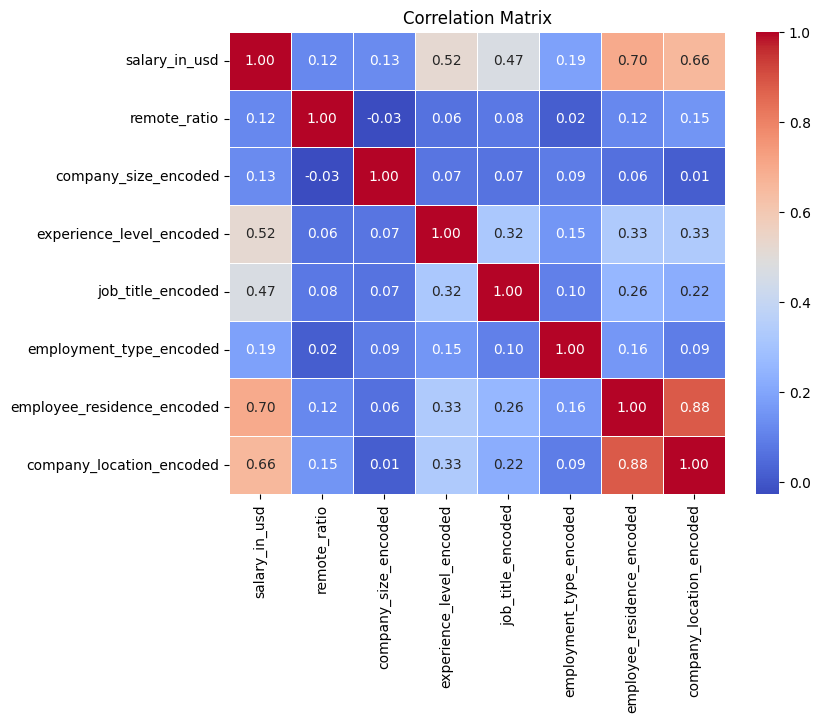

In [31]:
df.columns
corr_matrix = df.corr()
# Plot heatmap
plt.figure(figsize=(8, 6))  # Set figure size
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

## Splitting data into Test and Train sets

In [32]:
X = df[['remote_ratio','company_size_encoded', 
        'experience_level_encoded', 'job_title_encoded',
       'employment_type_encoded', 'employee_residence_encoded',
       'company_location_encoded']].copy()

y = df['salary_in_usd']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Normalizing Data

In [33]:

# Initialize scaler
scaler = StandardScaler()

# Apply transformation
y_train = y_train.values.reshape(-1, 1)
y_test = y_test.values.reshape(-1, 1)

y_train = scaler.fit_transform(y_train)
y_test = scaler.transform(y_test)

X_train = scaler.fit_transform(X_train.values)
X_test = scaler.transform(X_test.values)

## Fitting model

In [34]:
model = LinearRegression()

In [35]:
model.fit(X_train, y_train)

LinearRegression()

## Predicting Based on Test set

In [36]:
y_pred = model.predict(X_test)

## Getting Performance metrics on Test Set

In [37]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared Score: {r2:.2f}")

Mean Squared Error: 0.35
R-squared Score: 0.63


## Making sets ready for plotting

In [38]:
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)
print("y_pred shape:", y_pred.shape)

X_test shape: (111, 7)
y_test shape: (111, 1)
y_pred shape: (111, 1)


## Flattening 2D vectors for plotting

In [39]:
y_test = y_test.ravel()
y_pred = y_pred.ravel()

In [40]:
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)
print("y_pred shape:", y_pred.shape)

X_test shape: (111, 7)
y_test shape: (111,)
y_pred shape: (111,)


## Plotting

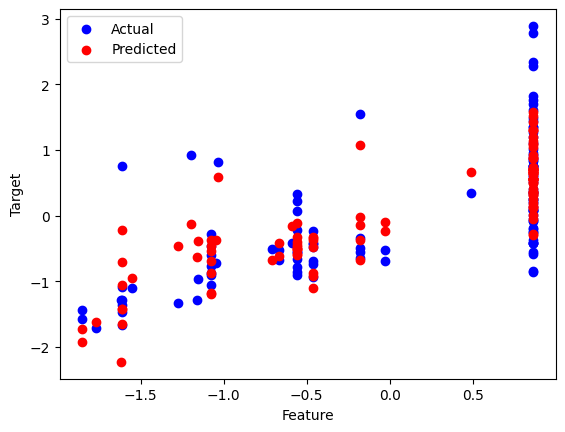

In [41]:
plt.scatter(X_test[:,5], y_test, color="blue", label="Actual")
plt.scatter(X_test[:,5], y_pred, color="red", label="Predicted")
plt.xlabel("Feature")
plt.ylabel("Target")
plt.legend()
plt.show()